# Python for Data Science
General Assembly workshop

Saturday, December 17, 2016

## Pandas: Basic Data Wrangling

In [167]:
# import statements
import numpy as np
import pandas as pd

### (1) Working with a single row or column

In [168]:
data1 = {'state':['Ohio','Ohio','Ohio','Nevada','Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'population':[1.5, 1.7, 3.6, 2.4, 2.9]
        }

df1 = pd.DataFrame(data1, index=['one','two','three','four','five'])
# default index is just row number

df1

,population,state,year
one,1.5,Ohio,2000
two,1.7,Ohio,2001
three,3.6,Ohio,2002
four,2.4,Nevada,2001
five,2.9,Nevada,2002


In [169]:
# retrieve a single column
df1['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

In [170]:
# alternatively:
df1.state

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

In [171]:
df1

,population,state,year
one,1.5,Ohio,2000
two,1.7,Ohio,2001
three,3.6,Ohio,2002
four,2.4,Nevada,2001
five,2.9,Nevada,2002


In [172]:
# retrieve a single row:
# returns first row
df1.iloc[0]

population     1.5
state         Ohio
year          2000
Name: one, dtype: object

In [173]:
# also returns first row
df1.loc['one']

population     1.5
state         Ohio
year          2000
Name: one, dtype: object

In [174]:
# can pass either integer or label index
df1.ix[0]

population     1.5
state         Ohio
year          2000
Name: one, dtype: object

In [175]:
# can pass either integer or label index
df1.ix['one']

# preferable to loc and iloc

population     1.5
state         Ohio
year          2000
Name: one, dtype: object

In [176]:
df1

,population,state,year
one,1.5,Ohio,2000
two,1.7,Ohio,2001
three,3.6,Ohio,2002
four,2.4,Nevada,2001
five,2.9,Nevada,2002


In [177]:
# columns can be modified by assignment
df1['new_var'] = 16.5

In [178]:
df1

,population,state,year,new_var
one,1.5,Ohio,2000,16.5
two,1.7,Ohio,2001,16.5
three,3.6,Ohio,2002,16.5
four,2.4,Nevada,2001,16.5
five,2.9,Nevada,2002,16.5


In [179]:
# You can overwrite a column by simply re-assigning it
df1['new_var'] = np.arange(5)

In [180]:
df1

,population,state,year,new_var
one,1.5,Ohio,2000,0
two,1.7,Ohio,2001,1
three,3.6,Ohio,2002,2
four,2.4,Nevada,2001,3
five,2.9,Nevada,2002,4


When assinging lists or arrays to a column, the value's length must match the length of the DataFrame
The exception to this is if you assign a Series, it will be instead conformed exactly to the DataFrame's index, inserting missing values in any holes:

In [181]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two','four','five'])
val

two    -1.2
four   -1.5
five   -1.7
dtype: float64

In [182]:
df1

,population,state,year,new_var
one,1.5,Ohio,2000,0
two,1.7,Ohio,2001,1
three,3.6,Ohio,2002,2
four,2.4,Nevada,2001,3
five,2.9,Nevada,2002,4


In [183]:
df1['new_var_2'] = val
df1

,population,state,year,new_var,new_var_2
one,1.5,Ohio,2000,0,NaN
two,1.7,Ohio,2001,1,-1.2
three,3.6,Ohio,2002,2,NaN
four,2.4,Nevada,2001,3,-1.5
five,2.9,Nevada,2002,4,-1.7


In [184]:
# A column can be deleted using del on the dictionary format of the column
del df1['new_var_2']
df1

,population,state,year,new_var
one,1.5,Ohio,2000,0
two,1.7,Ohio,2001,1
three,3.6,Ohio,2002,2
four,2.4,Nevada,2001,3
five,2.9,Nevada,2002,4


### Exercises

In [185]:
data2 = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'population': [1.5, 1.7, 3.6, 2.4, 2.9]
       }

df2 = pd.DataFrame(data2, index=['one', 'two', 'three', 'four', 'five'])

In [186]:
# Print the entire dataframe "df2"
df2

,population,state,year
one,1.5,Ohio,2000
two,1.7,Ohio,2001
three,3.6,Ohio,2002
four,2.4,Nevada,2001
five,2.9,Nevada,2002


In [187]:
# print only the column "population"
df2['population']

one      1.5
two      1.7
three    3.6
four     2.4
five     2.9
Name: population, dtype: float64

In [188]:
# print only row 2. Use four different ways to do this
print(df2.loc['two'])
print(df2.iloc[1])
print(df2.ix[1])
print(df2.ix['two'])

population     1.7
state         Ohio
year          2001
Name: two, dtype: object
population     1.7
state         Ohio
year          2001
Name: two, dtype: object
population     1.7
state         Ohio
year          2001
Name: two, dtype: object
population     1.7
state         Ohio
year          2001
Name: two, dtype: object


In [189]:
# Create a new column "new_var2" with values (1,2,3,4,5)
# Use at least two different ways to do this
df2['new_var2'] = np.arange(1,6)
df2

# TO-DO: SECOND WAY

,population,state,year,new_var2
one,1.5,Ohio,2000,1
two,1.7,Ohio,2001,2
three,3.6,Ohio,2002,3
four,2.4,Nevada,2001,4
five,2.9,Nevada,2002,5


In [190]:
# delete column population
del df2['population']
df2

,state,year,new_var2
one,Ohio,2000,1
two,Ohio,2001,2
three,Ohio,2002,3
four,Nevada,2001,4
five,Nevada,2002,5


### (2) Select Multiple Rows / Columns (by Position)

In [191]:
df3 = pd.DataFrame(np.arange(16).reshape((4, 4)),
                 index=['Ohio', 'Colorado', 'Utah', 'New York'],
                 columns=['one', 'two', 'three', 'four'])

df3

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [192]:
# Select via column names
df3[['one','two']]

,one,two
Ohio,0,1
Colorado,4,5
Utah,8,9
New York,12,13


In [193]:
# Select via integer slicing
df3.ix[:2]
# Note that by default, the slicing is along rows

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [194]:
# Same results below (note: this time by [row, column] format)
df3.ix[:2,]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [195]:
# Same results below
df3.ix[:2, :]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [196]:
# Same results below
df3.ix[:2, :]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [197]:
# Same results below
df3.ix[0:2, :]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [198]:
# Same results below
df3.ix[['Ohio','Colorado'],]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [199]:
# Integer slicing can be done on both rows and / or columns
df3.ix[:, 1:3]

,two,three
Ohio,1,2
Colorado,5,6
Utah,9,10
New York,13,14


In [200]:
df3.ix[:2, 1:3]

,two,three
Ohio,1,2
Colorado,5,6


In [201]:
# Select via integer list
df3.ix[[1,3], [1,3]]

,two,four
Colorado,5,7
New York,13,15


In [202]:
df3.ix[1:3, :]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11


In [203]:
df3.ix[1,1]

5

### Exercises:

In [204]:
data2 = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'population': [1.5, 1.7, 3.6, 2.4, 2.9]
       }

df2 = pd.DataFrame(data2, index=['one', 'two', 'three', 'four', 'five'])

df2

,population,state,year
one,1.5,Ohio,2000
two,1.7,Ohio,2001
three,3.6,Ohio,2002
four,2.4,Nevada,2001
five,2.9,Nevada,2002


In [205]:
# Select population using column names
df2[['population']]

,population
one,1.5
two,1.7
three,3.6
four,2.4
five,2.9


In [206]:
# Select the first two rows and all columns using .iloc
df2.ix[:2, :]

,population,state,year
one,1.5,Ohio,2000
two,1.7,Ohio,2001


In [207]:
# Select the first two rows and all columns using .loc
df2.ix[['one','two']]

,population,state,year
one,1.5,Ohio,2000
two,1.7,Ohio,2001


In [208]:
# Select the first two columns and all rows using .loc



In [209]:
# Select the frist two columns and all rows using .iloc



In [210]:
# Select the frist two rows adn first two columns using .iloc



### (3) Selecting Multiple Rows / Columns / Rows (by Boolean Indexing)

In [211]:
df3 = pd.DataFrame(np.arange(16).reshape((4, 4)),
                 index=['Ohio', 'Colorado', 'Utah', 'New York'],
                 columns=['one', 'two', 'three', 'four'])

df3

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [212]:
# Another common operation is the use of boolean vectors to filter the data

In [213]:
# First, the boolean vector:
df3.one > 0

Ohio        False
Colorado     True
Utah         True
New York     True
Name: one, dtype: bool

In [214]:
# then, pass the boolean vector into the dataframe, to filter the data
df3[df3.one > 0]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [215]:
df3

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [216]:
df3 > 5

,one,two,three,four
Ohio,False,False,False,False
Colorado,False,False,True,True
Utah,True,True,True,True
New York,True,True,True,True


In [217]:
# Pass the array on the entire dataframe
# Where the criterion doesn't fit, the dataframe will be returned as missing
df3[df3 > 5]

,one,two,three,four
Ohio,NaN,NaN,NaN,NaN
Colorado,NaN,NaN,6.0,7.0
Utah,8.0,9.0,10.0,11.0
New York,12.0,13.0,14.0,15.0


Multiple vectors can be passed into the dataframe.  The operators are:
- | for or
- & for and
- ~ for not

These **must** be grouped by using parentheses.

In [218]:
df3[(df3.one > 0) & (df3.two == 5)]

,one,two,three,four
Colorado,4,5,6,7


In [219]:
df3[(df3.one > 0) & (df3.two > 5)]

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [220]:
df3[(df3.one > 0) | (df3.two > 5)]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [221]:
df3[~(df3.one > 0)]

,one,two,three,four
Ohio,0,1,2,3


### Exercises

In [222]:
data2 = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'population': [1.5, 1.7, 3.6, 2.4, 2.9]
       }

df2 = pd.DataFrame(data2, index=['one', 'two', 'three', 'four', 'five'])

df2

,population,state,year
one,1.5,Ohio,2000
two,1.7,Ohio,2001
three,3.6,Ohio,2002
four,2.4,Nevada,2001
five,2.9,Nevada,2002


In [223]:
# Filter the dataset to where state = Ohio and year = 2000
df2[(df2.state == "Ohio") & (df2.year == 2000)]

,population,state,year
one,1.5,Ohio,2000


In [224]:
# Filter the dataset to where state = Nevada or year is greater than 2000
df2[(df2.state == "Nevada") | (df2.year > 2000)]

,population,state,year
two,1.7,Ohio,2001
three,3.6,Ohio,2002
four,2.4,Nevada,2001
five,2.9,Nevada,2002


In [225]:
# Filter dataset to where state is not Nevada
df2[~(df2.state == "Nevada")]

,population,state,year
one,1.5,Ohio,2000
two,1.7,Ohio,2001
three,3.6,Ohio,2002


### (4) Selecting by Callable

For those of you familiar with functional programming, **.loc**, **.iloc**, **.ix** and also [ ] indexing can accept a callable as indexer. The callable must be a function with one argument (the calling Series, DataFrame or Panel) and that returns valid output for indexing.

In [226]:
df3 = pd.DataFrame(np.arange(16).reshape((4, 4)),
                 index=['Ohio', 'Colorado', 'Utah', 'New York'],
                 columns=['one', 'two', 'three', 'four'])

df3

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [227]:
df3.one.loc[lambda s: s > 3]

Colorado     4
Utah         8
New York    12
Name: one, dtype: int64

### (5) Delete multiple columns and rows
Panda dataframes have a drop functionality that allows data to be removed via either the x or the y axis.  Official documentation can be found [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html).

In [228]:
df3 = pd.DataFrame(np.arange(16).reshape((4, 4)),
                 index=['Ohio', 'Colorado', 'Utah', 'New York'],
                 columns=['one', 'two', 'three', 'four'])

df3

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [229]:
# dropping rows can be specified by index
df3.drop(['Colorado','Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


Note: since the default axis is set to 0 (which is for dropping rows), whether we refer to the axis or not, it will be the same result here

In [230]:
df3.drop(['Colorado','Ohio'], axis = 0)

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [231]:
# for dropping axis, the axis must be specified or else there will be an error
df3.drop(['one','two'], axis = 1)

,three,four
Ohio,2,3
Colorado,6,7
Utah,10,11
New York,14,15


In [232]:
# Since the default for inplace is setas false, the actual dataframe, df3, is actually not affected
# What we are doing essentially is creating a view
df3

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [233]:
# To actually drop the columns, we will need to either:
    # set inplace = True OR
    # reassign the dataset

In [234]:
df3 = df3.drop(['one'], axis = 1)
df3

,two,three,four
Ohio,1,2,3
Colorado,5,6,7
Utah,9,10,11
New York,13,14,15


In [235]:
df3.drop(['two'], axis = 1, inplace = True)
df3

,three,four
Ohio,2,3
Colorado,6,7
Utah,10,11
New York,14,15


Here's a link to the relevant [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)

#### Exercises

In [236]:
data2 = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'population': [1.5, 1.7, 3.6, 2.4, 2.9]
       }

df2 = pd.DataFrame(data2, index=['one', 'two', 'three', 'four', 'five'])

df2

,population,state,year
one,1.5,Ohio,2000
two,1.7,Ohio,2001
three,3.6,Ohio,2002
four,2.4,Nevada,2001
five,2.9,Nevada,2002


In [237]:
# drop column "population"
df2.drop(['population'], axis = 1, inplace = True)
df2

,state,year
one,Ohio,2000
two,Ohio,2001
three,Ohio,2002
four,Nevada,2001
five,Nevada,2002


In [238]:
# drop row with index "five"
df2.drop(['five'], axis = 0, inplace = True)

In [239]:
# according to the documentation, what is the default setting for raising errors?

# TO-DO

In [240]:
df4 = pd.DataFrame(np.arange(25).reshape((5, 5)),
                 index=['Ohio', 'Colorado', 'Utah', 'New York', 'California'],
                 columns=['one', 'two', 'three', 'four', 'five'])

df4

,one,two,three,four,five
Ohio,0,1,2,3,4
Colorado,5,6,7,8,9
Utah,10,11,12,13,14
New York,15,16,17,18,19
California,20,21,22,23,24


In [241]:
# CHALLENGE EXERCISE
# select all columns where row "Colorado" >= 7
# HINT: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.transpose.html
df4.T[df4.T.Colorado >= 7]

,Ohio,Colorado,Utah,New York,California
three,2,7,12,17,22
four,3,8,13,18,23
five,4,9,14,19,24


## Pandas: Data Mining, Summarizing and Analyzing

In [242]:
# import statements
import numpy as np
import pandas as pd

### (1) Summary Statistics (Round 1)
Pandas objects are equipped with a set of common mathematical and statistical methods. Most of these fall into the category of reductions or summary statistics, methods that extract a single value (like the sum or mean) from the rows or columns of a DataFrame.

In [243]:
# generate sample data
df7 = pd.DataFrame([[1.4, np.nan]
                    , [7.1, -4.5]
                    , [np.nan, np.nan]
                    , [0.75, -1.3]]
                   , index = ['a', 'b', 'c', 'd']
                   , columns = ['one', 'two'])

df7

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


Cumulative functions, like **.sum()** returns a single number per column/row.  All cumulative functions (sum, mean, median, var, std, skew, etc) follow the same format.

In [244]:
# the default sums over columns
df7.sum()

one    9.25
two   -5.80
dtype: float64

In [245]:
# same as above
df7.sum(axis = 0)

one    9.25
two   -5.80
dtype: float64

In [246]:
# passing axis = 1 sums over the rows instead:
df7.sum(axis = 1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

NA values are excluded unless the entire slice (row or column in this case) is NA. This can be disabled using the skipna option:

In [247]:
# the default
df7.mean(axis = 1)

a    1.400
b    1.300
c      NaN
d   -0.275
dtype: float64

In [248]:
# same as above:
df7.mean(axis = 1, skipna = True)

a    1.400
b    1.300
c      NaN
d   -0.275
dtype: float64

In [249]:
# do not exclude NA by reverting skipna = False:
df7.mean(axis = 1, skipna = False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

#### Exercises:

In [250]:
df8 = pd.DataFrame([[1.4, np.nan, 1]
                    , [7.1, -4.5, 2]
                    , [np.nan, np.nan, 3]
                    , [0.75, -1.3, np.nan]]
                   , index = ['a', 'b', 'c', 'd']
                   , columns = ['one', 'two', 'three'])
df8

,one,two,three
a,1.40,NaN,1.0
b,7.10,-4.5,2.0
c,NaN,NaN,3.0
d,0.75,-1.3,NaN


In [251]:
# find median of df8 by calculating along the rows, skipping over missing values
df8.median(axis = 1, skipna = True)

a    1.200
b    2.000
c    3.000
d   -0.275
dtype: float64

In [252]:
# find standard deviation (std) of df8 along the columns, 
# including the missing values in the calculation
df8.std(axis = 0, skipna = False)

one     NaN
two     NaN
three   NaN
dtype: float64

### (2) Summary Statistics (Round 2)

In [253]:
# generate some data
df9 = pd.DataFrame([  [1.4, np.nan, 1]
                    , [7.1, -4.5, 2]
                    , [np.nan, np.nan, 3]
                    , [0.75, -1.3, np.nan]
                    , [1.40, -1.3, 2.0]
                    , [1.0, 2.0, 3.0]
                    , [3.0, 3.0, 3.0]
                    , [2.0, 2.0, 10.0]]
                   , index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
                   , columns = ['one', 'two', 'three'])

df9

,one,two,three
a,1.40,NaN,1.0
b,7.10,-4.5,2.0
c,NaN,NaN,3.0
d,0.75,-1.3,NaN
e,1.40,-1.3,2.0
f,1.00,2.0,3.0
g,3.00,3.0,3.0
h,2.00,2.0,10.0


In [254]:
# when table is too large to display, easier to find # of rows / columns using .shape()
df9.shape

(8, 3)

In [255]:
# head() by default displays the first five rows of a dataframe
df9.head()

,one,two,three
a,1.40,NaN,1.0
b,7.10,-4.5,2.0
c,NaN,NaN,3.0
d,0.75,-1.3,NaN
e,1.40,-1.3,2.0


In [256]:
# to display more or less, adjust it by passing in n = # rows to display
df9.head(n = 2)

,one,two,three
a,1.4,NaN,1.0
b,7.1,-4.5,2.0


In [257]:
df9.tail(n = 1)

,one,two,three
h,2.0,2.0,10.0


In [258]:
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html
df9.describe()

,one,two,three
count,7.000000,6.000000,7.000000
mean,2.378571,-0.016667,3.428571
std,2.209422,2.850556,2.992053
min,0.750000,-4.500000,1.000000
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,7.100000,3.000000,10.000000


In [259]:
# count() counts the # of non-null values over each column or row, as specified by the axis
# default counts over columns:
df9.count()

one      7
two      6
three    7
dtype: int64

In [260]:
# it is the same as the following:
df9.count(axis = 0)

one      7
two      6
three    7
dtype: int64

In [261]:
# by switching the axis, it can also be applied over rows
df9.count(axis = 1)

a    2
b    3
c    1
d    2
e    3
f    3
g    3
h    3
dtype: int64

**Value_counts()** counts the number of distinct values in each column.  Think of this as Panda's version of "SELECT DISTINCT.. COUNT(*)"

Documentation [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [262]:
df9.one.value_counts()

1.40    2
2.00    1
7.10    1
3.00    1
1.00    1
0.75    1
Name: one, dtype: int64

In [263]:
df9.two.value_counts()

-1.3    2
 2.0    2
 3.0    1
-4.5    1
Name: two, dtype: int64

In [264]:
df9.three.value_counts()

3.0     3
2.0     2
10.0    1
1.0     1
Name: three, dtype: int64

#### Exercises:

In [265]:
df10 = pd.DataFrame([[1.4, np.nan, 1, 3]
                    , [7.1, -4.5, 2, 5]
                    , [np.nan, np.nan, 3, 7]
                    , [0.75, -1.3, np.nan, 8]]
                   , index = ['a', 'b', 'c', 'd']
                   , columns = ['one', 'two', 'three', 'four'])
df10

,one,two,three,four
a,1.40,NaN,1.0,3
b,7.10,-4.5,2.0,5
c,NaN,NaN,3.0,7
d,0.75,-1.3,NaN,8


In [266]:
# find dimensions of df10
# how many rows / columns are there?
df10.shape

(4, 4)

In [267]:
# apply describe() to df10
df10.describe()

,one,two,three,four
count,3.000000,2.000000,3.0,4.000000
mean,3.083333,-2.900000,2.0,5.750000
std,3.493685,2.262742,1.0,2.217356
min,0.750000,-4.500000,1.0,3.000000
25%,NaN,NaN,NaN,4.500000
50%,NaN,NaN,NaN,6.000000
75%,NaN,NaN,NaN,7.250000
max,7.100000,-1.300000,3.0,8.000000


In [268]:
# display the last 3 rows of the dataframe
df10.tail(3)

,one,two,three,four
b,7.10,-4.5,2.0,5
c,NaN,NaN,3.0,7
d,0.75,-1.3,NaN,8


In [269]:
# count the non-null values over each row
df10.count(axis = 1)

a    3
b    4
c    2
d    3
dtype: int64

### (3) Working with Duplicate Data

In [270]:
# generate some data
df11 = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4, 4, 4],
                     'Qu2': [2, 3, 1, 2, 3, 3, 3],
                     'Qu3': [1, 5, 2, 4, 4, 4, 4]})
df11

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4
5,4,3,4
6,4,3,4


By default, **drop_duplicates()** removes the entire row where there is duplication, and only keeps the first row where duplication occurs.

Documentation [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html).

In [271]:
df11.drop_duplicates()

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


#### Exercises

In [272]:
df12 = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4, 4, 4, 1, 0, 1],
                     'Qu2': [2, 3, 1, 2, 3, 3, 3, 1, 0, 1],
                     'Qu3': [1, 5, 2, 4, 4, 4, 4, 1, 0, 1]})
df12

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4
5,4,3,4
6,4,3,4
7,1,1,1
8,0,0,0
9,1,1,1


Read up on the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html) for drop_duplicates.  Then think about how you would drop duplicates in place for df12?

In [273]:
# What's another way to drop duplicates in place?



In [274]:
# How would you drop all duplicates and not even keep the first occurence?



### (4) Correlation and Covarience
Some summary statistics, like correlation and covariance, are computed from pairs of arguments. Let’s consider some DataFrames of stock prices and volumes obtained from Yahoo! Finance:

In [275]:
df14_returns = pd.DataFrame([
                      [-0.084311, 0.014634, -0.086538]
                    , [-0.033944, 0.035137, -0.017241]
                    , [-0.033780, 0.010544, -0.033498]
                    ]
                   , index = ['2000-01-03', '2000-01-04', '2000-01-05']
                   , columns = ['AAPL', 'IBM', 'MSFT'])
df14_returns

,AAPL,IBM,MSFT
2000-01-03,-0.084311,0.014634,-0.086538
2000-01-04,-0.033944,0.035137,-0.017241
2000-01-05,-0.033780,0.010544,-0.033498


In [276]:
df14_returns.corr()

,AAPL,IBM,MSFT
AAPL,1.000000,0.356919,0.973884
IBM,0.356919,1.000000,0.559689
MSFT,0.973884,0.559689,1.000000


In [277]:
df14_returns.cov()

,AAPL,IBM,MSFT
AAPL,0.000848,0.000137,0.001028
IBM,0.000137,0.000174,0.000267
MSFT,0.001028,0.000267,0.001313


In [278]:
# If we want to look at the correlation between two stock prices
df14_returns.MSFT.corr(df14_returns.IBM)

0.5596887389523223

In [279]:
df14_returns.IBM.corr(df14_returns.MSFT)

0.5596887389523223

In [280]:
# If we want to look at the covariance between two stock prices:
df14_returns.MSFT.cov(df14_returns.IBM)

0.00026727853200000001

#### Exercises

In [281]:
df14_returns

,AAPL,IBM,MSFT
2000-01-03,-0.084311,0.014634,-0.086538
2000-01-04,-0.033944,0.035137,-0.017241
2000-01-05,-0.033780,0.010544,-0.033498


In [282]:
# using df14_returns, what is the correlation between AAPL and IBM
df14_returns.AAPL.corr(df14_returns.IBM)

0.35691922517121782

In [283]:
# using df14_returns, what is the covaraince between AAPL and IBM?
df14_returns.AAPL.cov(df14_returns.IBM)

0.00013699492649999999

In [284]:
# How do I output the Spearman correlation instead of default correlation?
df14_returns.AAPL.corr(df14_returns.IBM, method = "spearman")

-0.5

#### (5) How to Handle Missing Data
Missing data is common in most data analysis applications. The default for most commands on pandas objects is to exclude missing data. Pandas uses the floating point value NaN (Not a Number) to represent missing data in both floating as well as in non-floating point arrays.

In [285]:
df15 = pd.DataFrame([[1., 6.5, 3.], 
                     [1., np.nan, np.nan],
                     [np.nan, np.nan, np.nan], 
                     [np.nan, 6.5, 3.]])
df15

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [286]:
# There are a few ways to filter out / drop missing values
# by default, dropna() drops all rows that have any missing values
df15.dropna()

,0,1,2
0,1.0,6.5,3.0


In [287]:
# by passing how='all', this will only drop rows that are all NA:
df15.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [288]:
# if instead of dropping rows, we want to drop columns, then change the axis
df15.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [289]:
# to impute missing data, use fillna()
df15.fillna(method='ffill') # forward fill method

,0,1,2
0,1.0,6.5,3.0
1,1.0,6.5,3.0
2,1.0,6.5,3.0
3,1.0,6.5,3.0


#### Exercises

Challenge Exercise 1:

What are the four options for "method" in the fillna() command?
What does each of them mean?

* fillna(method = 'ffill')
* fillna(method = 'bfill')
* fillna(method = 'pad')
* fillna(method = 'backfill') 

Challenge Exercise 2:

Given the dataset below, apply each of the 4 fill methods in Challenge Exercise 1

In [290]:
df16 = pd.DataFrame([[1., 6.5, 3.], 
                     [1., np.nan, np.nan],
                     [np.nan, np.nan, np.nan], 
                     [np.nan, 6.5, 3.]])
df16

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [291]:
df16.fillna(method='ffill')

,0,1,2
0,1.0,6.5,3.0
1,1.0,6.5,3.0
2,1.0,6.5,3.0
3,1.0,6.5,3.0


In [292]:
df16.fillna(method='bfill')

,0,1,2
0,1.0,6.5,3.0
1,1.0,6.5,3.0
2,NaN,6.5,3.0
3,NaN,6.5,3.0


In [293]:
df16.fillna(method='pad')

,0,1,2
0,1.0,6.5,3.0
1,1.0,6.5,3.0
2,1.0,6.5,3.0
3,1.0,6.5,3.0


In [294]:
df16.fillna(method='backfill')

,0,1,2
0,1.0,6.5,3.0
1,1.0,6.5,3.0
2,NaN,6.5,3.0
3,NaN,6.5,3.0


## Matplotlib: Data Visualization

In [295]:
# import statements
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [296]:
# 0. Load a sample dataset
df_titanic = sns.load_dataset('titanic')
print(df_titanic.shape)
df_titanic.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


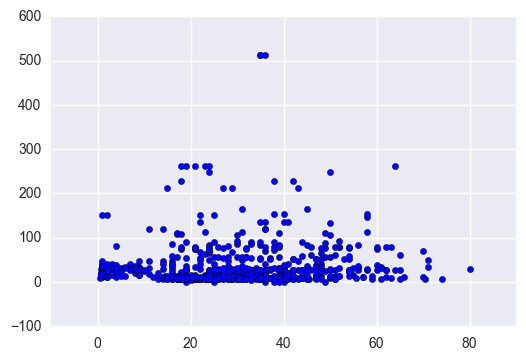

In [297]:
# 1. Scatterplot chart
# basic command for plotting a scatterplot is plt.scatter

X = df_titanic['age']
y = df_titanic['fare']

plt.scatter(X, y)
plt.show()

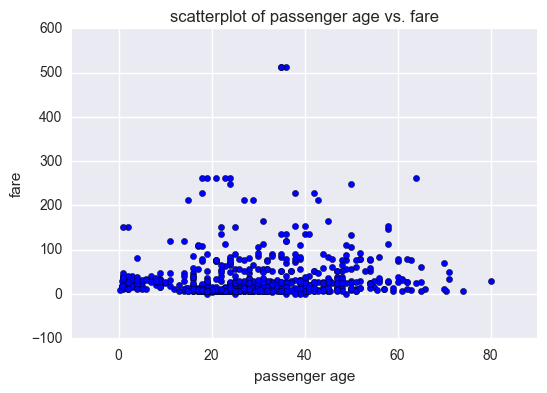

In [298]:
# customize further by adding titles and axis labels to the plot
X = df_titanic['age']
y = df_titanic['fare']

plt.scatter(X, y)

plt.xlabel('passenger age')
plt.ylabel('fare')
plt.title('scatterplot of passenger age vs. fare')

plt.show()

#### Exercise

Using the same dataset df_titanic, plot a scatterplot with age on the Y axis and fare on the x axis.  Label the xaxis, yaxis, and give the plot a title.

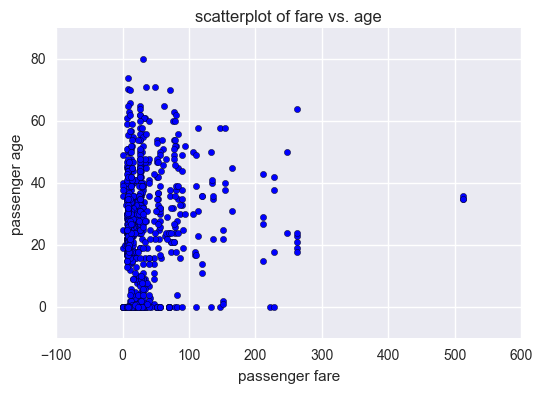

In [335]:
X = df_titanic['fare']
y = df_titanic['age']

plt.scatter(X, y)

plt.xlabel('passenger fare')
plt.ylabel('passenger age')
plt.title('scatterplot of fare vs. age')

plt.show()


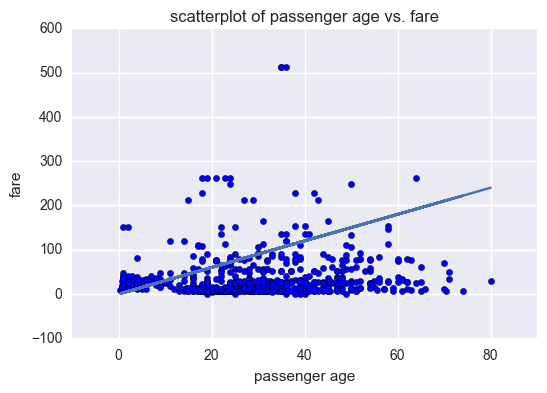

In [300]:
# (2) Line chart

# building off the graph above, let's add a line y = 3X to the plot

X = df_titanic['age']
y = df_titanic['fare']

plt.scatter(X, y)
plt.plot(X, 3*X)

plt.xlabel('passenger age')
plt.ylabel('fare')
plt.title('scatterplot of passenger age vs. fare')

plt.show()

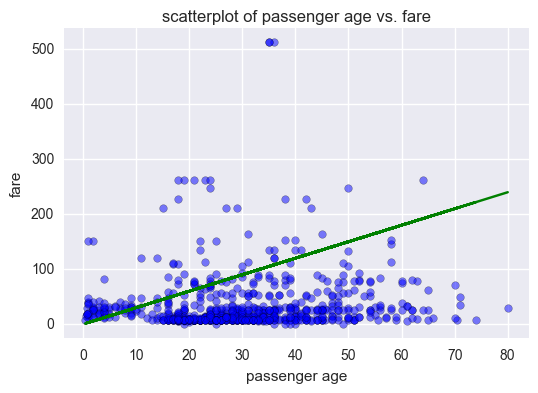

In [301]:
# can further customize plot by color and formatting
X = df_titanic['age'] 
y = df_titanic['fare']

plt.scatter(X, y, s = 30, alpha = 0.5) # s = dot size, alpha = transparency of dot [0, 1]
plt.plot(X, 3*X, color = 'green') # color = line color
plt.axis('tight') # plt.axis('tight') autoadjusts x and y axis limits such that all data is shown.

plt.xlabel('passenger age')
plt.ylabel('fare')
plt.title('scatterplot of passenger age vs. fare')

plt.show()

#### Exercise:
1. Plot a scatterplot using the df_titanic dataset.  Y = age, X = survived.  
2. Set the scatterplot colors as red.
3. Set the scatterplot dot size = 10, with transparency = 00.8
4. Label x-axis, y-axis, and give the graph a title.  
5. Make sure the x limit and y limit frame the graph appropriately.

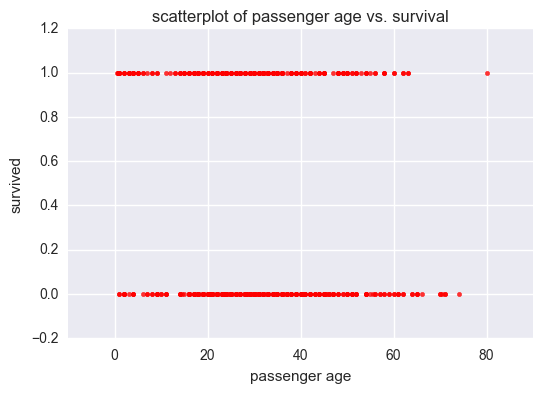

In [302]:
X = df_titanic['age']
y = df_titanic['survived']

plt.scatter(X, y, color='red', s = 10, alpha= 0.8)

plt.xlabel('passenger age')
plt.ylabel('survived')
plt.title('scatterplot of passenger age vs. survival')

In [303]:
# (3) Boxplots
# standardized way of displaying the distribution of data based on the a five number summary:
# min, first quartile, median, third quartile, and max
# basic command is plt.boxplot

In [304]:
# the graph from exercise above is better visualized as a boxplot
# but, first, fill in the missing values for age
df_titanic['age'].fillna(0, inplace = True)

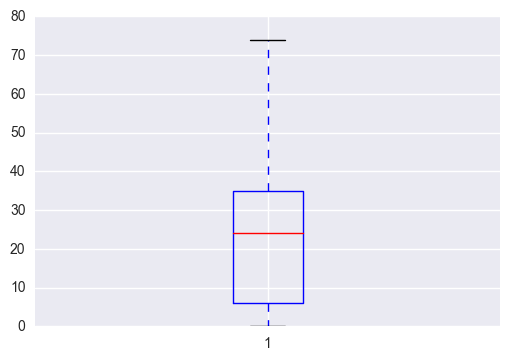

In [305]:
# a simple boxplot
plt.boxplot(df_titanic['age'])
plt.show()

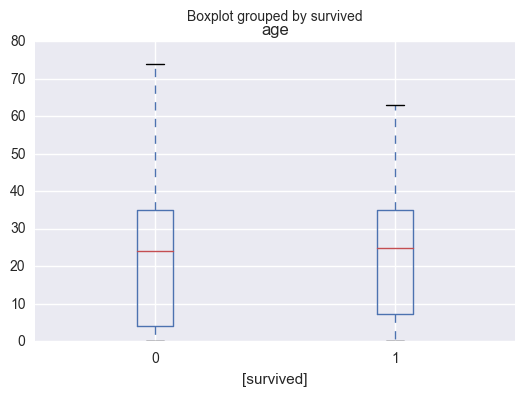

In [306]:
# separate out the boxplot by survival is a bit trickier

df_boxplot = df_titanic[['survived', 'age']]
df_boxplot['age'].fillna(0)
df_boxplot.describe()
df_boxplot.boxplot(by = 'survived')
plt.show()

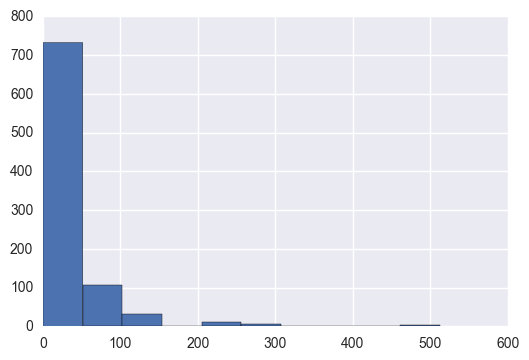

In [307]:
# (4) Histograms
# commonly used to visualize the distribution of a single variable
# plt.hist

# let's start with a basic histogram of passenger fare
plt.hist(df_titanic['fare'])
plt.show()

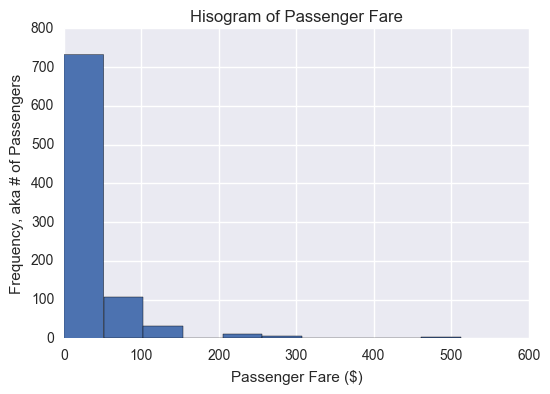

In [308]:
# including axes labels

plt.hist(df_titanic['fare'])

plt.title("Hisogram of Passenger Fare")
plt.xlabel("Passenger Fare ($)")
plt.ylabel('Frequency, aka # of Passengers')
plt.show()

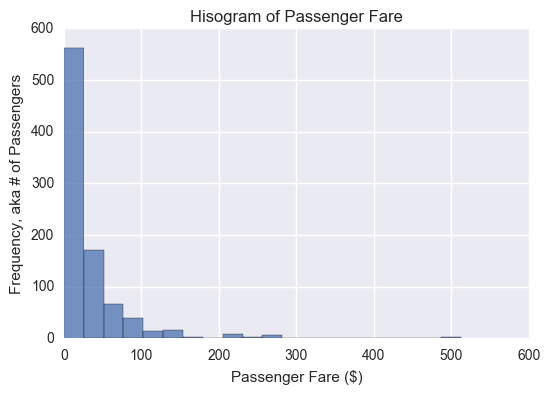

In [309]:
# more customization: histogram specific stuff

plt.hist(df_titanic['fare'], bins=20, alpha = 0.75)
# alpha decreases transparency
# cumulative: if true, gives cumulative frequency

plt.title("Hisogram of Passenger Fare")
plt.xlabel("Passenger Fare ($)")
plt.ylabel('Frequency, aka # of Passengers')
plt.show()

#### Challenge Exercise

The variable 'age' in the dataset df_titanic has some missing values.  Before we can plot a histogram, we must first ensure that the variable does not have any missing values.

1. Fill the missing values for "age" with 0.
2. Plot histogram for 'age'
3. Set # of bins to be 100
4. Set transparency to be 0.5
5. Label all axis and title.
6. Bonus if you can do #1 INSIDE of the plotting function!

[Hint](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)

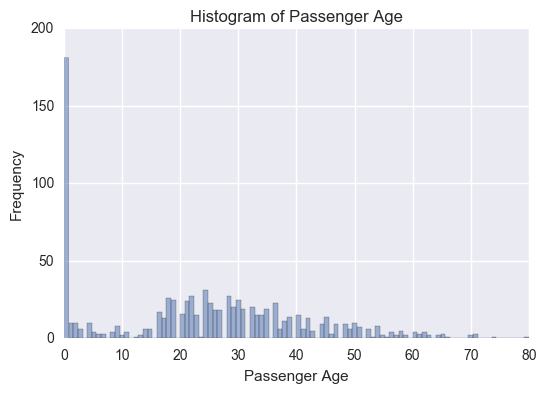

In [336]:
plt.hist(df_titanic['age'].fillna(0), bins = 100, alpha = 0.5)

plt.title("Histogram of Passenger Age")
plt.xlabel("Passenger Age")
plt.ylabel("Frequency")
plt.show()

# Further Resources 

1. Check out the full **matplolib** gallery to see what else you can do with the library!  [here](http://matplotlib.org/gallery.html)

2. Feeling confident you've mastered matplotlib?  Check out **[Bokeh](http://bokeh.pydata.org/en/latest/)**!  Not only are the graphics richer, the graphs are also *interactive*!!

3. Finally, **[seaborn](http://seaborn.pydata.org/)** is more than just a color palette.  It is also possible to plot rich graphics using only seaborn!

## Scikit-Learn: Machine Learning

In [311]:
# import statements
import sklearn
print(sklearn.__version__)

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston, load_digits, load_iris
from sklearn.model_selection import cross_val_score # valid only on sklearn v0.18.1 or later

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

0.18.1


### Basic Terminology

In general, a learning problem considers a set of n samples of data and then tries to predict properties of unknown data. If each sample is more than a single number and, for instance, a multi-dimensional entry (aka multivariate data), it is said to have several attributes or features.

We can separate learning problems in 2 large categories:


**Supervised Learning**, in which the data comes with additional attributes that we want to predict (Click here to go to the scikit-learn supervised learning page).This problem can be either:

- **Regression**: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.


- **Classification**: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. An example of classification problem would be the handwritten digit recognition example, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.
     

**Unsupervised Learning**, in which the training data consists of a set of input vectors x without any corresponding target values. The goal in such problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine the distribution of data within the input space, known as density estimation, or to project the data from a high-dimensional space down to two or three dimensions for the purpose of visualization.

### (1) Regression Model

You use a regression model when the Y being predicted is a continuous variable

In [312]:
# understanding the data

boston = load_boston()
boston.keys()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [313]:
# Understanding Y
df_boston_y = pd.DataFrame(boston.target)
df_boston_y.columns = ['HousingPrices']
df_boston_y.describe()

,HousingPrices
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


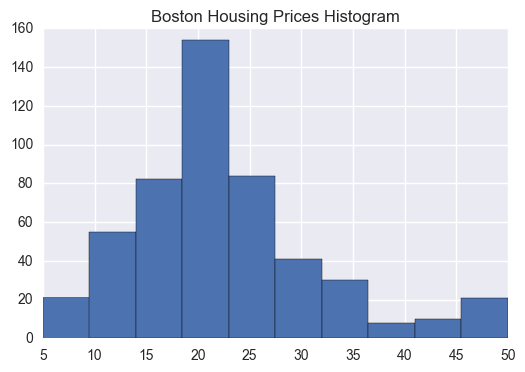

In [314]:
plt.hist(boston.target)
plt.title("Boston Housing Prices Histogram")
plt.show()

In [315]:
# understanding X
df_boston_X = pd.DataFrame(boston.data)
df_boston_X.columns = boston.feature_names
df_boston_X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [316]:
df_boston_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [317]:
# Build the regression model
X, y = boston.data, boston.target

lm = LinearRegression()
model = lm.fit(X, y)

print("Model accuracy %f" %model.score(X,y))

Model accuracy 0.740608


In [318]:
# Visualize the model
pd.DataFrame(zip(boston.feature_names, model.coef_), columns=['features','estinatedCoeffs'])

,features,estinatedCoeffs
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


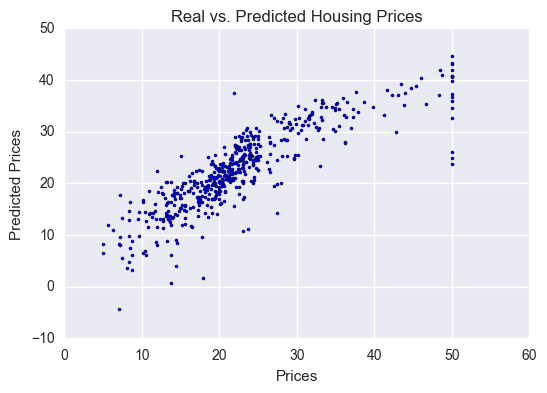

In [319]:
# plot fitted values

lm.predict(X)

plt.scatter(y, lm.predict(X), s = 5)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Real vs. Predicted Housing Prices")
plt.show()

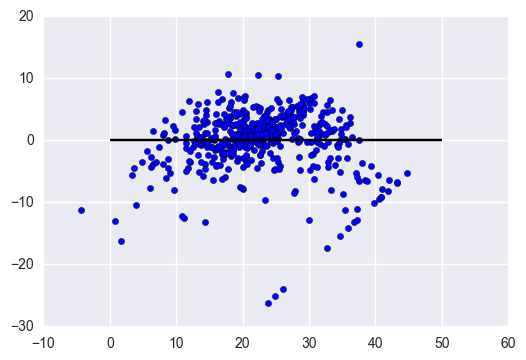

In [320]:
# plot residuals
plt.scatter(lm.predict(X), lm.predict(X) - y)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.show()

### (2) Logistic Regression

What is classification?
* Classification is a machine learning problem for solving a set value given the knowledge we have about that value.  Binary classification is the simplest form of classification.  However, classification problems can have multiple class labels.

When do you use a logistic regression?
* When you have a binary variable as Y

In [321]:
# understanding the data
iris = load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [322]:
# Understanding Y
df_iris_y = pd.DataFrame(iris.target)
df_iris_y.columns = ['Iris_Type']
df_iris_y.Iris_Type.value_counts()

2    50
1    50
0    50
Name: Iris_Type, dtype: int64

In [323]:
# Understanding X
df_iris_X = pd.DataFrame(iris.data)
df_iris_X.columns = iris.feature_names
df_iris_X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [324]:
df_iris_X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [325]:
# Build the classification model
X, y = iris.data, iris.target

clf = LogisticRegression()
model = clf.fit(X, y)
print("Model accuracy %f" %model.score(X, y))

Model accuracy 0.960000


### (3) Decision Tree
What is a decision tree?
* Decision trees are like the game "20 questions." They make decisions by answering a series of questions, most often binary questions (Y/N). We want the smallest set of questions to get the right answer. Each question should reduce the search space as much as possible

In [326]:
# Use decision tree to run classification on the same data
iris = load_iris()
print(iris.DESCR)

X, y = iris.data, iris.target

clf = DecisionTreeClassifier()
model = clf.fit(X,y)

print("Model accuracy %f" %model.score(X,y))

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [327]:
# To-do:
# go through following on decision trees:
# http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

### (4) Machine Learning
Machine learning is iterative and can handle larger datasets and produce more complex models.

In [328]:
# load a large data set
digits = load_digits()
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


In [329]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

#### CONCEPT: Overfitting
Overfitting occurs when a model is excessively complex, such as having too many parameters relative to the number of observations. An overfitted model may fit very well on existing data, but the model will have a low accuracy hwen fit on a new set of data.

In [330]:
X, y = digits.data, digits.target

clf = DecisionTreeClassifier()
model = clf.fit(X, y)

print("Model accuracy %f" %model.score(X,y))

Model accuracy 1.000000


#### CONCEPT: Cross validation
Cross validation is a method used to correct over-fitting

In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k - 1 subsamples are used as training data.

In [331]:
X, y = digits.data, digits.target

clf = DecisionTreeClassifier()
model = clf.fit(X, y)
model_score = cross_val_score(model, X, y, cv = 10)

print("Model accuracy: ", model_score)
print("Accuracy %0.2f (+/-) %0.2f)" % (model_score.mean(), model_score.std() * 2))

('Model accuracy: ', array([ 0.8       ,  0.86338798,  0.83425414,  0.81666667,  0.79329609,
        0.89385475,  0.90502793,  0.79775281,  0.79661017,  0.84659091]))
Accuracy 0.83 (+/-) 0.08)


### (5) Machine Learning: Application via Random Forest
#### CONCEPT: Random Forest
**Random forests** or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitide of **decision trees** at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training data.

In [333]:
# Application: Random Forest
X, y = digits.data, digits.target

clf = RandomForestClassifier()
model = clf.fit(X, y)
model_score = cross_val_score(model, X, y, cv = 10)

print("Accuracy %0.2f (+/- %0.2f)" % (model_score.mean(), model_score.std() * 2))

Accuracy 0.92 (+/- 0.05)


##### Exercise:
Using the iris dataset, fit a random forest model. Evaluate using cross validation and confidence intervals. How does it compare?

In [334]:
iris = load_iris()
X, y = iris.data, iris.target

clf = RandomForestClassifier()
model = clf.fit(X, y)
model_score = cross_val_score(model, X, y, cv = 10)

print("Accuracy %0.2f (+/- %0.2f)" % (model_score.mean(), model_score.std() * 2))

Accuracy 0.97 (+/- 0.07)
